In [1]:
import sys
sys.path.append('../Codes/')
import numpy as np
import matplotlib.pyplot as plt
from Immuno_models import*
#from Bio import Phylo
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return np.log(a)+np.log(np.sqrt(-b)) + b*(x-c)**2

Text_files_path = '../../../../Dropbox/Research/Evolution_Immune_System/Text_files/'

N_A = 6.02214076e23
k_BT = 1.380649e-23*293
style.use('seaborn-paper')
print(style.available)
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


## Sequences generated from the MS

In [4]:
%%time
L = 9
n_seqs = np.array([1e2, 1e3, 1e4, 1e5, 1e6])
Array_Sequences = []

for n_seq in n_seqs:
    Sequences = pickle.load( open( Text_files_path + "Sequences_MJ2_L-%d_n_seq-%d.pkl"%(L, n_seq), "rb" ) )
    Array_Sequences.append(Sequences)
    print('Master Seq:', Sequences[0].sequence, 'Antigen Seq:', Sequences[0].complementary_sequence)
    
Array_Sequences = np.array(Array_Sequences, dtype = Sequence)

Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
CPU times: user 8.22 s, sys: 689 ms, total: 8.91 s
Wall time: 19.6 s


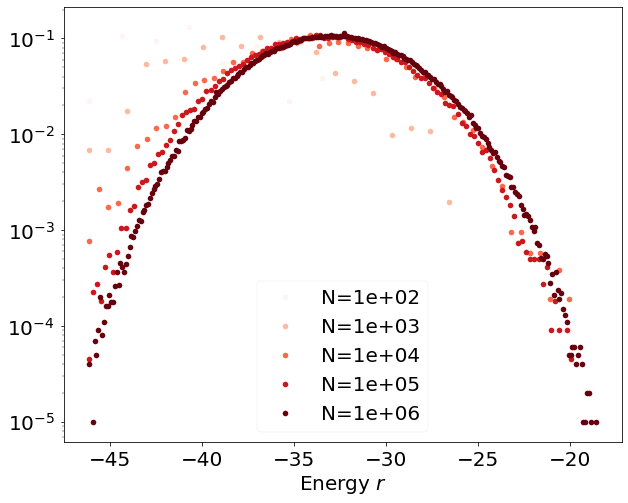

In [5]:
for k, Sequences in enumerate(Array_Sequences):
    fig1, ax1 = plt.subplots(1,1,figsize=(10,8))
    distances = plot_histogram_hamming_distance(Sequences = Sequences, ax = ax1)
    plt.close()
    
fig, ax = plt.subplots(1,1,figsize=(10,8))
colors = plt.cm.Reds(np.linspace(0,1,len(n_seqs)))
for k, Sequences in enumerate(Array_Sequences):
    energies, data_energies = plot_histogram_energy(Sequences = Sequences, normalization = 1, bins = 'auto', color = colors[k], n_seq = n_seqs[k], density = True, ax = ax)
#ax.set_xlim(np.min(energies),np.min(energies)+8 )


/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/robertomorantovar/anaconda3/lib/python3.8/s

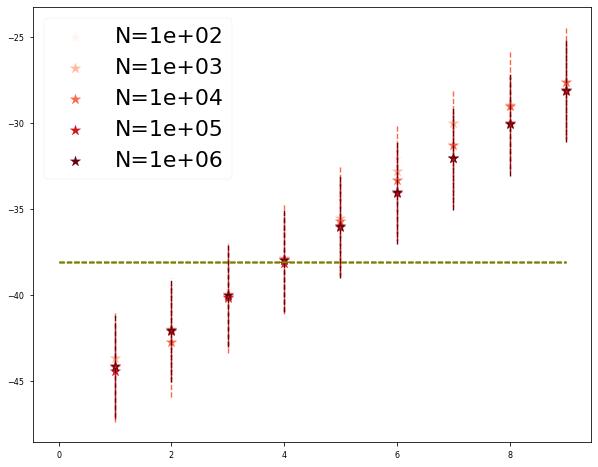

In [6]:
fig, ax = plt.subplots(1,1, figsize = (10, 8))

for k, Sequences in enumerate(Array_Sequences):
    #calculate mean energy given d
    mean_energies_given_d = np.array([])

    for d in range(1,10):
        temp_array = [Sequences[i].energy for i in range(int(len(Sequences))) if (Sequences[i].hamming_distance == d)]
        mean_energy_given_d = np.mean(temp_array)
        var_energy_given_d = np.var(temp_array)
        mean_energies_given_d = np.append(mean_energies_given_d, mean_energy_given_d)
    #-------------------------------------------------- 
    #___________________________________________
    #plot_scatter_hamming_distance_energy(distances = distances, energies = energies, color = 'steelblue', ax = ax)
    #plot_scatter_hamming_distance_energy(distances = distances_left_tail_8, energies = energies_left_tail_8, color = 'olivedrab', ax = ax)
    ax.scatter(range(1,10), mean_energies_given_d, color = colors[k], s = 120, marker = '*', label = 'N=%.e'%(n_seqs[k]))
    ax.vlines(range(1,10), mean_energies_given_d-np.sqrt(var_energy_given_d), mean_energies_given_d+np.sqrt(var_energy_given_d), color = colors[k], linestyle = '--')
    ax.hlines(np.min(energies)+8, 0, 9, color = 'olive', linestyle = '--')
    ax.legend(loc = 0, fontsize = 22)


## Sequences generated randomly

In [7]:
%%time
L = 9
n_seqs = np.array([1e2, 1e3, 1e4, 1e5, 1e6])
Array_Sequences = []

for n_seq in n_seqs:
    Sequences = pickle.load( open( Text_files_path + "Sequences_random_MJ2_L-%d_n_seq-%d.pkl"%(L, n_seq), "rb" ) )
    for Sequence_i in Sequences:
        Sequence_i.hamming_distance = hamming_distance(Sequence_i.sequence, Sequence_i.complementary_sequence)
    Array_Sequences.append(Sequences)
    print('Master Seq:', Sequences[0].sequence, 'Antigen Seq:', Sequences[0].complementary_sequence)

Array_Sequences = np.array(Array_Sequences, dtype = Sequence)



Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
CPU times: user 9.71 s, sys: 785 ms, total: 10.5 s
Wall time: 10.5 s


array(['ccccbbcbb', 'ccccbbcbb', 'ccccbbcbb', 'ccccbbcbb', 'ccccbbcbb'],
      dtype='<U32')

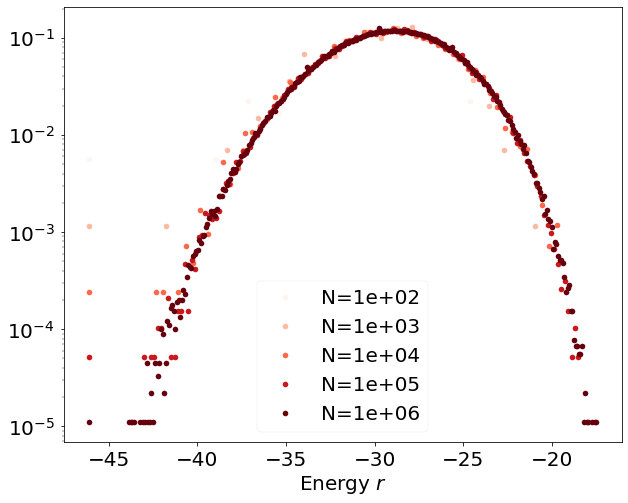

In [8]:
for k, Sequences in enumerate(Array_Sequences):
    fig1, ax1 = plt.subplots(1,1,figsize=(10,8))
    distances = plot_histogram_hamming_distance(Sequences = Sequences, ax = ax1)
    plt.close()

fig, ax = plt.subplots(1,1,figsize=(10,8))
colors = plt.cm.Reds(np.linspace(0,1,len(n_seqs)))
min_seqs = np.array([])
for k, Sequences in enumerate(Array_Sequences):
    energies, data_energies = plot_histogram_energy(Sequences = Sequences, normalization = 1, bins = 'auto', color = colors[k], n_seq = n_seqs[k], density = True, ax = ax)
    min_energy = np.min(energies)
    min_seqs = np.append(min_seqs, [i.sequence for i in Sequences if (i.energy == min_energy)])
    
min_seqs


/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


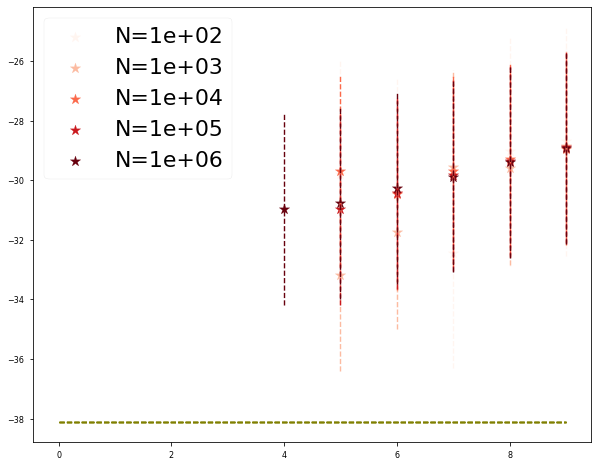

In [9]:
fig, ax = plt.subplots(1,1, figsize = (10, 8))

for k, Sequences in enumerate(Array_Sequences):
    #calculate mean energy given d
    mean_energies_given_d = np.array([])

    for d in range(1,10):
        temp_array = [Sequences[i].energy for i in range(int(len(Sequences))) if (Sequences[i].hamming_distance == d)]
        mean_energy_given_d = np.mean(temp_array)
        var_energy_given_d = np.var(temp_array)
        mean_energies_given_d = np.append(mean_energies_given_d, mean_energy_given_d)
    #-------------------------------------------------- 
    #___________________________________________
    #plot_scatter_hamming_distance_energy(distances = distances, energies = energies, color = 'steelblue', ax = ax)
    #plot_scatter_hamming_distance_energy(distances = distances_left_tail_8, energies = energies_left_tail_8, color = 'olivedrab', ax = ax)
    ax.scatter(range(1,10), mean_energies_given_d, color = colors[k], s = 120, marker = '*', label = 'N=%.e'%(n_seqs[k]))
    ax.vlines(range(1,10), mean_energies_given_d-np.sqrt(var_energy_given_d), mean_energies_given_d+np.sqrt(var_energy_given_d), color = colors[k], linestyle = '--')
    ax.hlines(np.min(energies)+8, 0, 9, color = 'olive', linestyle = '--')
    ax.legend(loc = 0, fontsize = 22)

